In [78]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [79]:
#import data
data = pd.read_csv("/content/crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## EDA

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [81]:
data1=data.drop(['Unnamed: 0'],axis=1)
data1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [82]:
#Normalize heterogenous numerical data using standard scaler
data_norm = StandardScaler().fit_transform(data1)
data_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## **Hierarchical cluster**

### Dendrogram

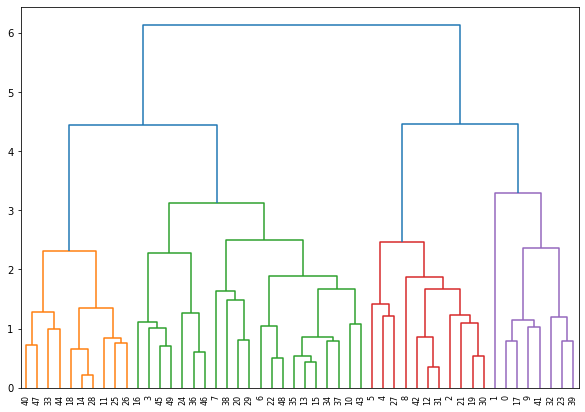

In [83]:
import scipy.cluster.hierarchy as sch
# Creating dendrogram to find the optimal no of clusters
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(data_norm,'complete'))

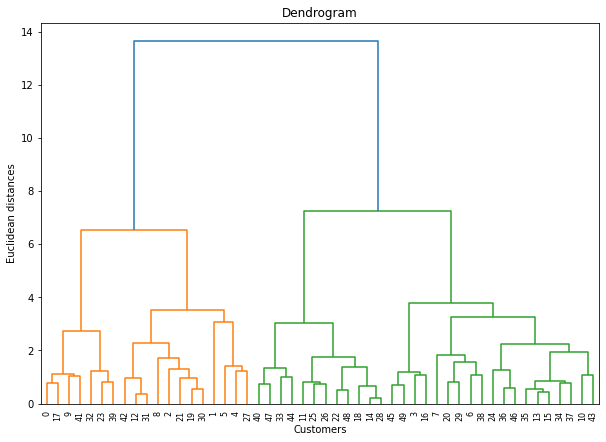

In [84]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(data_norm,method= 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [85]:
# from dendrogram we can clearly say we have 4 clusters

### Predict cluster in dataset

In [86]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean',linkage='ward')
hc

AgglomerativeClustering(n_clusters=4)

In [87]:
y= pd.DataFrame(hc.fit_predict(data_norm),columns=['clustersid'])
y.value_counts()

clustersid
0             19
1             12
2             12
3              7
dtype: int64

In [88]:
# Add cluster to dataset
data_hc=data1.copy();
data_hc['clustersid'] = hc.labels_;
data_hc

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


### Visualizing the cluster

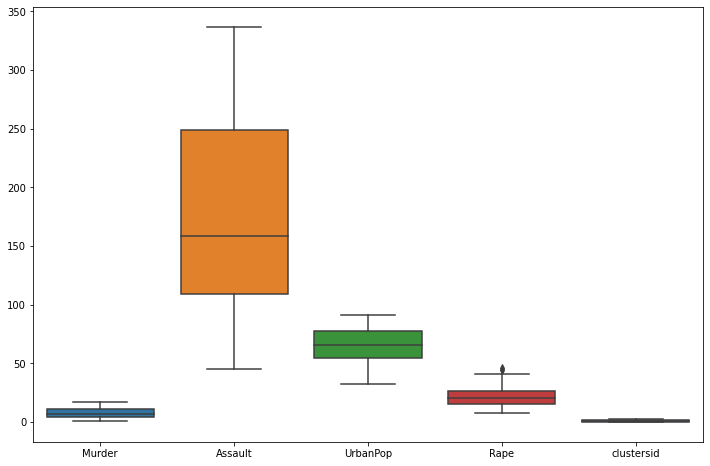

In [89]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(data=data_hc)

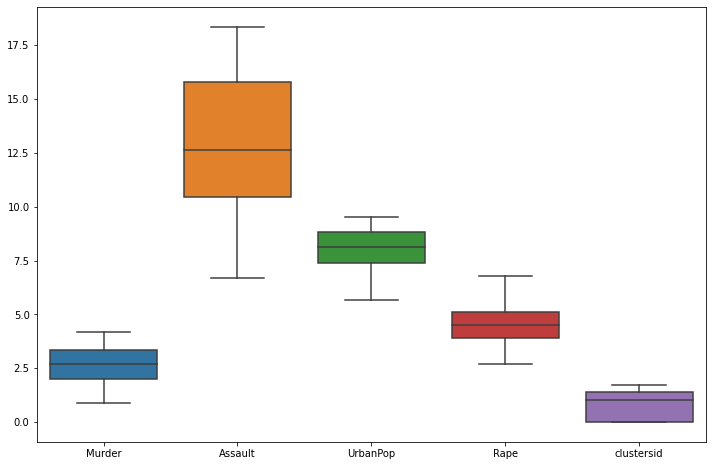

In [90]:
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data_hc))

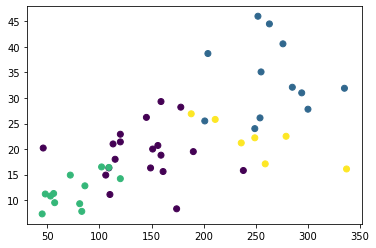

In [91]:
plt.scatter (x= data_hc.Assault, y=data_hc.Rape, c=data_hc.clustersid)

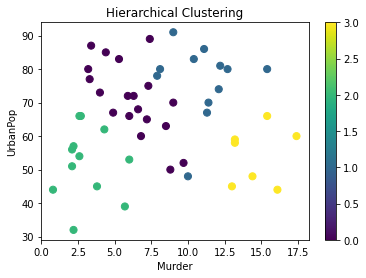

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data_hc['Murder'],data_hc['UrbanPop'],
                     c=data_hc.clustersid ,s=50)
ax.set_title('Hierarchical Clustering')
ax.set_xlabel('Murder')
ax.set_ylabel('UrbanPop')
plt.colorbar(scatter)

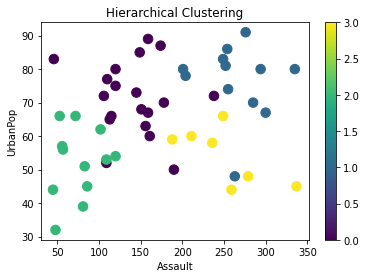

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data_hc['Assault'],data_hc['UrbanPop'],
                     c=data_hc.clustersid ,s=90)
ax.set_title('Hierarchical Clustering')
ax.set_xlabel('Assault')
ax.set_ylabel('UrbanPop')
plt.colorbar(scatter)

## **KMeans cluster**

### Elbow plot

In [94]:
#Within cluster sum of squares criterion
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(data_norm)
  wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

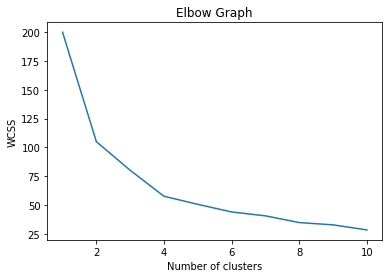

In [95]:
#creating elbow plot to find the optimal no of clusters
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [96]:
# elbow point falls on 4. So there are 4 clusters

### Model fitting

In [97]:
#Kmeans algorithm k=4
km = KMeans(n_clusters=4, init = 'k-means++',max_iter=300,
            n_init=10, random_state=20).fit(data_norm)
km

KMeans(n_clusters=4, random_state=20)

In [98]:
km.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [99]:
data_km = data1.copy();
data_km['clustersid'] = km.labels_;
data_km

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,1


In [100]:
y=pd.DataFrame(km.fit_predict(data_km),columns=['clustersid'])
y.value_counts()

clustersid
2             16
0             14
1             10
3             10
dtype: int64

In [101]:
#group data by clusters(K=4)
data_km.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308


### Visualization

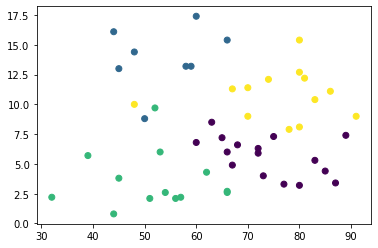

In [102]:
plt.scatter(data_km.UrbanPop, data_km.Murder, c=data_km.clustersid)

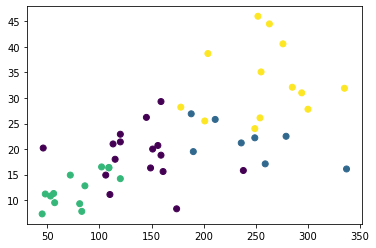

In [103]:
plt.scatter(data_km.Assault, data_km.Rape, c=data_km.clustersid)

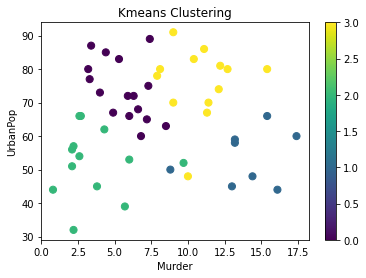

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data_km['Murder'],data_km['UrbanPop'],
                     c=data_km.clustersid ,s=50)
ax.set_title('Kmeans Clustering')
ax.set_xlabel('Murder')
ax.set_ylabel('UrbanPop')
plt.colorbar(scatter)

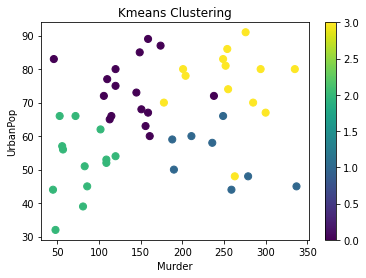

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data_km['Assault'],data_km['UrbanPop'],
                     c=data_km.clustersid ,s=50)
ax.set_title('Kmeans Clustering')
ax.set_xlabel('Murder')
ax.set_ylabel('UrbanPop')
plt.colorbar(scatter)

## **DBSCAN clustering**

In [121]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=2,min_samples=4)
dbs.fit(data_norm)

DBSCAN(eps=2, min_samples=4)

In [122]:
dbs.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [123]:
#Adding clusters to the dataset
data_db = data1.copy();
data_db['clusters'] = dbs.labels_;
data_db

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [124]:
from sklearn.metrics import silhouette_score
silhouette_score(data_db,dbs.labels_)

0.022307154844392937

In [125]:
#Adding cluster to the dataset
data_db

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [126]:
data_db.groupby('clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters,,,,
-1,10.000000,263.000000,48.000000,44.500000
0,7.742857,168.877551,65.897959,20.757143
